A través de los datos de **temperaturas climáticas del Estado de Michigan - USA**, veremos si las temperaturas mínimas y máximas del **año 2015**, superan (o no), las temperaturas, mínimas y máximas de la **década 2005-2014**.

Para esta tarea pondremos en práctica habilidades de *manipulación de datos, modelado y visualización*, con el objetivo de obtener en última instancia un gráfico que nos ayude a responder el interrogante de si *el cambio climático es visible para el año 2015 con respecto a la década inmediatamente anterior*, y además buscaremos que el *gráfico sea lo suficientemente claro para cualquier tipo de audiencia*. 

#### Step 1: Abrir el Data Frame e investigar su estructura

In [72]:
#importanmos pandas y leemos el archivo CSV correspondiente a los datos de temperaturas de Michigan - USA.

import pandas as pd

df = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv", sep= ",")

In [73]:
#Vemos la estructura del Data Frame (en adelante DF).
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [74]:
#Miramos el tipo de dato de cada una de las variables, y por cuestiones prácticas covertimos la variable "Date" a tipo datetime.

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ID          165085 non-null  object        
 1   Date        165085 non-null  datetime64[ns]
 2   Element     165085 non-null  object        
 3   Data_Value  165085 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.0+ MB


In [75]:
# Transformando los datos en grados Celsius (C°)
df['Data_Value'] = df['Data_Value'] / 10
df["Data_Value"].max()

40.6

In [76]:
#Contamos la cantidad de elementos mínimos y máximos, que nos ayuda a conocer el tamaño del DF.

df["Element"].value_counts()

Element
TMAX    83063
TMIN    82022
Name: count, dtype: int64

In [77]:
#y dividimos en dos objetos distintos, uno para temperaturas mínimas y otro para las máximas, esto nos ayudará a trabajar con los datos.

mínimos = df[df["Element"] ==  "TMIN"]
máximos = df[df["Element"] == "TMAX"]


#### Step 2: Limpieza y modelado del DF

In [78]:
#Filtramos los datos por la década 2005-2014 y por el 2015 por separado

mínimos_década = mínimos[(mínimos["Date"] >= "2005-01-01") & (mínimos["Date"] <= "2014-12-31")]
máximos_década = máximos[(máximos["Date"] >= "2005-01-01") & (máximos["Date"] <= "2014-12-31")]

mínimos_2015 = mínimos[(mínimos["Date"] >= "2015-01-01") & (mínimos["Date"] <= "2015-12-31")]
máximos_2015 = máximos[(máximos["Date"] >= "2015-01-01") & (máximos["Date"] <= "2015-12-31")]

#y chequeamos la cantidad de valores por cada división a modo prueba.
mínimos_década["Date"].value_counts() , máximos_década["Date"].value_counts(), mínimos_2015["Date"].value_counts()

(Date
 2011-12-07    23
 2009-11-26    23
 2012-09-14    23
 2010-07-27    23
 2009-08-12    23
               ..
 2014-02-26    15
 2014-02-09    14
 2014-05-25    14
 2014-02-08    14
 2014-05-11    13
 Name: count, Length: 3652, dtype: int64,
 Date
 2010-08-12    23
 2011-12-09    23
 2010-08-16    23
 2011-05-08    23
 2012-02-27    23
               ..
 2014-02-08    14
 2014-02-09    14
 2014-02-10    14
 2014-05-25    13
 2014-05-11    13
 Name: count, Length: 3652, dtype: int64,
 Date
 2015-02-12    20
 2015-05-19    20
 2015-03-30    20
 2015-07-05    20
 2015-05-31    20
               ..
 2015-10-03    16
 2015-11-20    16
 2015-12-05    16
 2015-12-02    15
 2015-12-01    15
 Name: count, Length: 365, dtype: int64)

In [79]:
#Vemos que el rango de fechas sea la indicada.
mínimos_2015["Date"].min(), mínimos_2015["Date"].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-12-31 00:00:00'))

In [80]:
#Y le saco los días 29 del mes de febrero para los años bisiestos a cada DF. Esto nos ayudará a unificar los días de año, teniendo los mismos 365 dias para todos los años que trabajaremos.

mínimos_década = mínimos_década[~((mínimos_década['Date'].dt.month == 2) & (mínimos_década['Date'].dt.day == 29))]
máximos_década = máximos_década[~((máximos_década['Date'].dt.month == 2) & (máximos_década['Date'].dt.day == 29))]
mínimos_2015 = mínimos_2015[~((mínimos_2015['Date'].dt.month == 2) & (mínimos_2015['Date'].dt.day == 29))]
máximos_2015 = máximos_2015[~((máximos_2015['Date'].dt.month == 2) & (máximos_2015['Date'].dt.day == 29))]

#Nuevamente chequeamos la cantidad de valores como prueba.
mínimos_década["Date"].value_counts() , máximos_década["Date"].value_counts()

(Date
 2011-12-07    23
 2011-10-06    23
 2010-07-27    23
 2009-08-12    23
 2008-08-29    23
               ..
 2014-02-11    15
 2014-02-08    14
 2014-02-09    14
 2014-05-25    14
 2014-05-11    13
 Name: count, Length: 3650, dtype: int64,
 Date
 2010-08-12    23
 2010-11-16    23
 2012-05-14    23
 2009-10-04    23
 2011-12-14    23
               ..
 2014-02-10    14
 2014-02-09    14
 2014-02-08    14
 2014-05-11    13
 2014-05-25    13
 Name: count, Length: 3650, dtype: int64)

In [81]:
mínimos_2015["Date"].max()

Timestamp('2015-12-31 00:00:00')

In [82]:
#ahora unificamos los DFs de mínimos (década y 2015)
mínimos_década_2015 = pd.concat([mínimos_década, mínimos_2015])

#Y hacemos lo mismo con el de máximos
máximos_década_2015 = pd.concat([máximos_década, máximos_2015])

mínimos_década_2015["Date"].value_counts() , máximos_década_2015["Date"].value_counts()

(Date
 2011-09-11    23
 2011-08-26    23
 2010-05-16    23
 2010-03-17    23
 2012-04-23    23
               ..
 2015-12-02    15
 2014-02-08    14
 2014-05-25    14
 2014-02-09    14
 2014-05-11    13
 Name: count, Length: 4015, dtype: int64,
 Date
 2011-09-22    23
 2010-02-16    23
 2010-05-23    23
 2012-05-10    23
 2011-09-01    23
               ..
 2014-02-08    14
 2014-02-09    14
 2014-02-10    14
 2014-05-25    13
 2014-05-11    13
 Name: count, Length: 4015, dtype: int64)

In [83]:
máximos_década_2015["Date"].max()

Timestamp('2015-12-31 00:00:00')

#### Step 3: Preparación de los datos para la visualización

In [84]:
# Filtramos los datos de 2015
mínimos_2015 = mínimos_década_2015[mínimos_década_2015['Date'].dt.year == 2015]
máximos_2015 = máximos_década_2015[máximos_década_2015['Date'].dt.year == 2015]

In [85]:
mínimos_2015["Date"].max()

Timestamp('2015-12-31 00:00:00')

In [86]:
# Obtenemos los datos de la década excluyendo 2015
mínimos_década_sin_2015 = mínimos_década_2015[mínimos_década_2015['Date'].dt.year != 2015]
máximos_década_sin_2015 = máximos_década_2015[máximos_década_2015['Date'].dt.year != 2015]

In [87]:
mínimos_década_sin_2015.head()

,ID,Date,Element,Data_Value
1,USC00208972,2009-04-29,TMIN,5.6
6,USC00207308,2010-06-29,TMIN,14.4
8,USW00004848,2007-12-14,TMIN,-1.6
11,USC00205822,2008-05-29,TMIN,2.8
12,USC00203712,2008-10-17,TMIN,1.7


In [88]:
#Probamos hacer una consulta para pensar la mejor manera de obtener un DF que tenga 365 observaciones, representando las temepraturas máximas y mínimas, por separado, dentro de la década en cuestión.

mínimos_década_sin_2015.query("Date.dt.month == 1 & Date.dt.day == 1")

,ID,Date,Element,Data_Value
142,USC00207308,2006-01-01,TMIN,-0.6
572,USC00208080,2006-01-01,TMIN,-0.6
1906,USC00205822,2005-01-01,TMIN,-1.7
1975,USC00200842,2006-01-01,TMIN,0.0
2035,USC00202308,2005-01-01,TMIN,-1.7
...,...,...,...,...
163949,USC00200842,2013-01-01,TMIN,-7.2
164212,USC00200230,2013-01-01,TMIN,-7.8
164511,USC00200032,2013-01-01,TMIN,-10.6
164796,USC00200032,2009-01-01,TMIN,-13.3


In [89]:
#En base a la forma de obtener los datos anterior, es decir por consulta, generaremos un iterador que obtenga las temperaturas mínimas para cada día dentro de la década
#es decir, para todos los 01-01 entre el 2005 y el 2014 conservaremos la temperatura más baja. Y esa lógica la repetiremos para todos los días del año.
import pandas as pd

# Creamos un DF vacío para almacenar los resultados
mínimos_década = pd.DataFrame(columns=mínimos_década_sin_2015.columns)

# Iteramos sobre cada día del año (del 1 al 365)
for day in range(1, 366):
    # Filtramos las observaciones correspondientes al día actual
    observaciones_dia = mínimos_década_sin_2015.query("Date.dt.dayofyear == @day")
    
    # Obtenemos el índice del registro con el valor mínimo de Data_Value para este día
    idx_min = observaciones_dia['Data_Value'].idxmin()
    
    # Extraemos el registro con el valor mínimo
    registro_min = mínimos_década_sin_2015.loc[idx_min]
    
    # Agregamos el registro mínimo al DF de resultados
    mínimos_década = pd.concat([mínimos_década, registro_min.to_frame().T], ignore_index=True)

# Reiniciamos el índice del DataFrame de resultados
mínimos_década.reset_index(drop=True, inplace=True)

In [90]:
#chequemos que el DF cumpla sólo con las 365 observaciones que queremos, es decir una para cada día del año.
mínimos_década["Date"].value_counts()

C:\Users\jiperez\AppData\Local\Temp\ipykernel_2468\1841770819.py:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  mínimos_década["Date"].value_counts()


Date
2013-01-01    1
2010-09-09    1
2013-09-07    1
2013-09-06    1
2010-09-05    1
             ..
2008-04-30    1
2012-04-29    1
2012-04-28    1
2012-04-27    1
2013-12-31    1
Name: count, Length: 365, dtype: int64

In [91]:
#Repetirmos el proceso con la misma lógica, pero para los máximos, en donde, en lugar de conservar los valores mínimos, conservaremos los máximos.

# Creamos un DF vacío para almacenar los resultados
máximos_década = pd.DataFrame(columns=máximos_década_sin_2015.columns)

# Iteramos sobre cada día del año (del 1 al 365)
for day in range(1, 366):
    # Filtramos las observaciones correspondientes al día actual
    observaciones_dia = máximos_década_sin_2015.query("Date.dt.dayofyear == @day")
    
    # Obtenemos el índice del registro con el valor máximo de Data_Value para este día
    idx_max = observaciones_dia['Data_Value'].idxmax()
    
    # Extraemos el registro con el valor máximo
    registro_max = máximos_década_sin_2015.loc[idx_max]
    
    # Agregamos el registro máximo al DF de resultados
    máximos_década = pd.concat([máximos_década, registro_max.to_frame().T], ignore_index=True)

# Reiniciamos el índice del DataFrame de resultados
máximos_década.reset_index(drop=True, inplace=True)

In [92]:
#chequemos que el DF cumpla sólo con las 365 observaciones que queremos, es decir una para cada día del año.
máximos_década["Date"].value_counts()

C:\Users\jiperez\AppData\Local\Temp\ipykernel_2468\2684275639.py:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  máximos_década["Date"].value_counts()


Date
2005-01-01    1
2014-09-09    1
2007-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-05-01    1
2014-04-30    1
2014-04-29    1
2009-04-28    1
2006-12-31    1
Name: count, Length: 365, dtype: int64

In [93]:
#Tras verificar el tipo de datos de las variables de DF, nos dimos cuenta que "Date" para el DF de mínimos quedó como objeto, lo transformamos a datetime, para su visualización.
mínimos_década['Date'] = pd.to_datetime(mínimos_década['Date'])


#### Step 4: Realizamos la visualización pensada desde un inicio


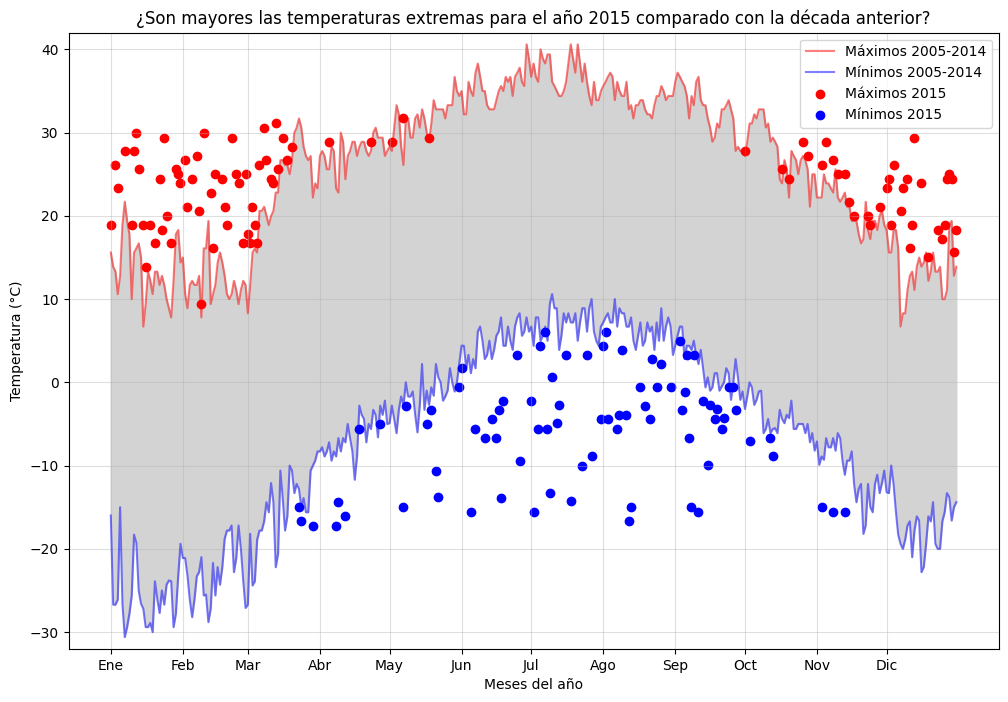

In [97]:
import matplotlib.pyplot as plt
import numpy as np

#Nos aseguramos que no hayan NAs entre nuestros datos
máximos_década_clean = máximos_década.dropna()
mínimos_década_clean = mínimos_década.dropna()
# Convertimos las columnas de temperatura a listas de Python
temperaturas_máximas_década = máximos_década_clean['Data_Value'].tolist()
temperaturas_mínimas_década = mínimos_década_clean['Data_Value'].tolist()

# Creamos la figura del gráfico
plt.figure(figsize=(12, 8))

# Graficamos las temperaturas máximas y mínimas de la década con sombreado gris entre ellas
plt.fill_between(range(len(temperaturas_máximas_década)), temperaturas_máximas_década, temperaturas_mínimas_década, color='lightgrey')

# Graficamos las temperaturas máximas y mínimas de la década
plt.plot(máximos_década_clean['Data_Value'], color='red', alpha= 0.5, label='Máximos 2005-2014')
plt.plot(mínimos_década_clean['Data_Value'], color='blue',alpha= 0.5, label='Mínimos 2005-2014')

# Filtramos los datos de 2015 que cumplen las condiciones de que sólo aparezcan los datos que esten por fuera del rango de mínimos y máximos de la década.
máximos_2015_indices = []
máximos_2015_valores = []
mínimos_2015_indices = []
mínimos_2015_valores = []

# Iteramos sobre los índices del DF máximos_2015
for i in range(min(len(máximos_2015), len(máximos_década))):
    if máximos_2015.iloc[i]['Data_Value'] > máximos_década.iloc[i]['Data_Value']:
        máximos_2015_indices.append(i)
        máximos_2015_valores.append(máximos_2015.iloc[i]['Data_Value'])

# Iteramos sobre los índices del DF mínimos_2015
for i in range(min(len(mínimos_2015), len(mínimos_década))):
    if mínimos_2015.iloc[i]['Data_Value'] < mínimos_década.iloc[i]['Data_Value']:
        mínimos_2015_indices.append(i)
        mínimos_2015_valores.append(mínimos_2015.iloc[i]['Data_Value'])

# Graficamos un scatter plot para temperaturas de 2015
plt.scatter(máximos_2015_indices, máximos_2015_valores, color='red', label='Máximos 2015')
plt.scatter(mínimos_2015_indices, mínimos_2015_valores, color='blue', label='Mínimos 2015')

# Configuramos los ejes y etiquetas
plt.xlabel('Meses del año')
plt.ylabel('Temperatura (°C)')
plt.title('¿Son mayores las temperaturas extremas para el año 2015 comparado con la década anterior?')
plt.legend()
plt.grid(True, alpha=0.4)
plt.ylim(-32, 42)

# Configuramos marcadores de ejes x para el inicio de cada mes
meses_inicio = [0] #generamos una lista vacía para el inicio de cada mes
días_meses = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]  # Días de cada mes
for i in range(1, len(días_meses)):
    meses_inicio.append(meses_inicio[i-1] + días_meses[i-1])
#Configuramos el nombre de las etiquetas del eje X para que sean los nombres de los meses del año.    
plt.xticks(meses_inicio, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostramos el gráfico
plt.show()

##plt.savefig('grafico_temperaturas.png')

**Conclusíón**

Si pensamos en la estaciones del año en Michigan - USA, y los meses de mayor calor y frio (temporada más calurosa entre mediados de mayo y septiembre, y más fría entre diciembre y febrero) vemos que en la temporada más calurosa del año en Michigan, las temperaturas más altas del período 2005-2014 superan a las del 2015. Sucede el mismo fenómenos en la temporada más fría, en donde las temperaturas más bajas se registran en la década 2005-2014. 

Ahora bien, el registro de temperaturas se rompe en el 2015 cuando nos movemos de temporada. Por ejemplo, existen registro de temepraturas muy bajas entre los meses de abril y noviembre, cuando en realidad son meses históricamente de temperaturas bajas, y tenemos temperaturas muy altas entre los meses que históricamente tienen temperaturas bajas. 

Esto nos da paso a pensar que la temporada de temperaturas altas y frías se "movió" para el año 2015, lo cual es atribuído normalmente al fenómeno del cambio climático. Será nuestra tarea averiguar si esto es una tendencia mirando los años subsiguientes.